In [109]:
#instagram reach analysis
#importing usefull libraries

In [110]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as px
import scipy
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [111]:
#imoprting Dataset
data=pd.read_csv("Instagram data.csv",encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [112]:
#checking if there is any null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [113]:
#there are no null values in the dataset.
#if there has been any null values we would have to drop them by {data=data.dropna()}

In [114]:
#Let's have a look at the insights of the columns to understand the datatype of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


##Analysing Instagram Reach

C:\Users\Asus\AppData\Local\Temp\ipykernel_9248\762178048.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




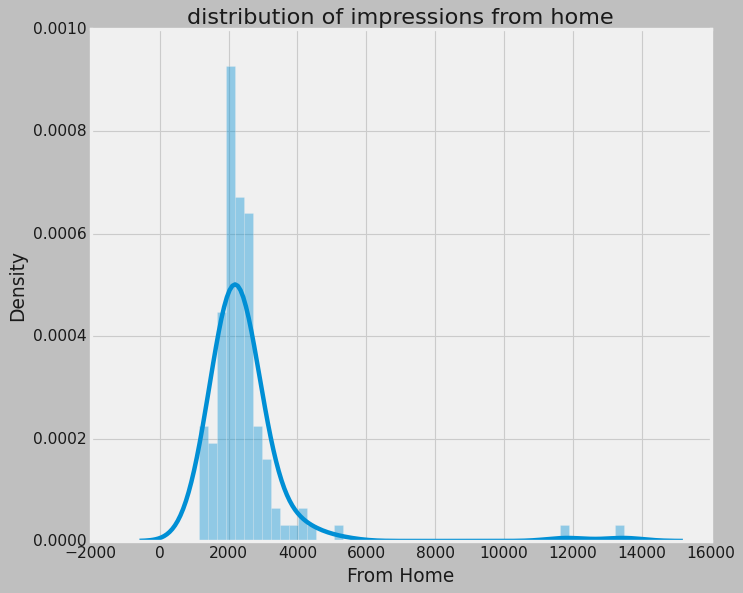

In [115]:
#First have a look at the distribution of impressions received from home
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("distribution of impressions from home")
sns.distplot(data['From Home'])
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_9248\2194406497.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




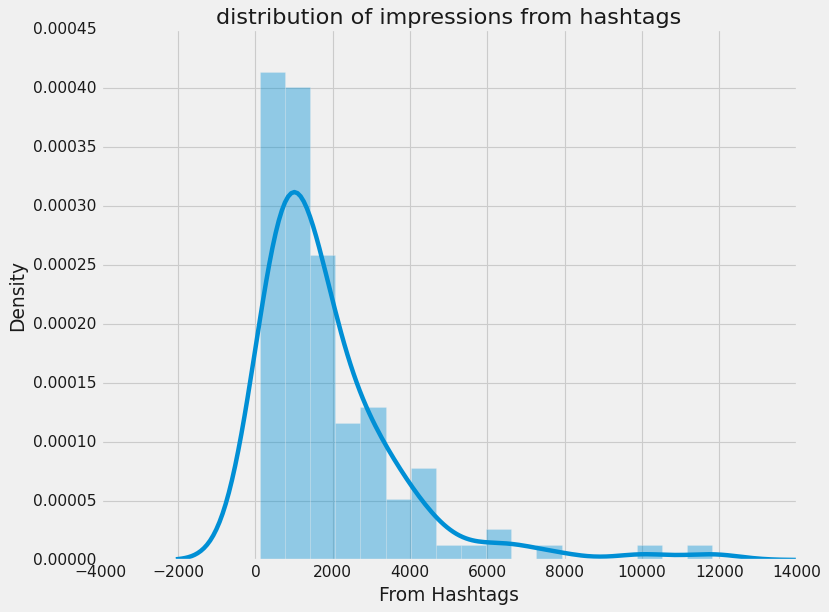

In [116]:
#Now Let's have a look at the distribution of the impressions recieved from hashtags
plt.figure(figsize=(10,8))
plt.title("distribution of impressions from hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_9248\440934591.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




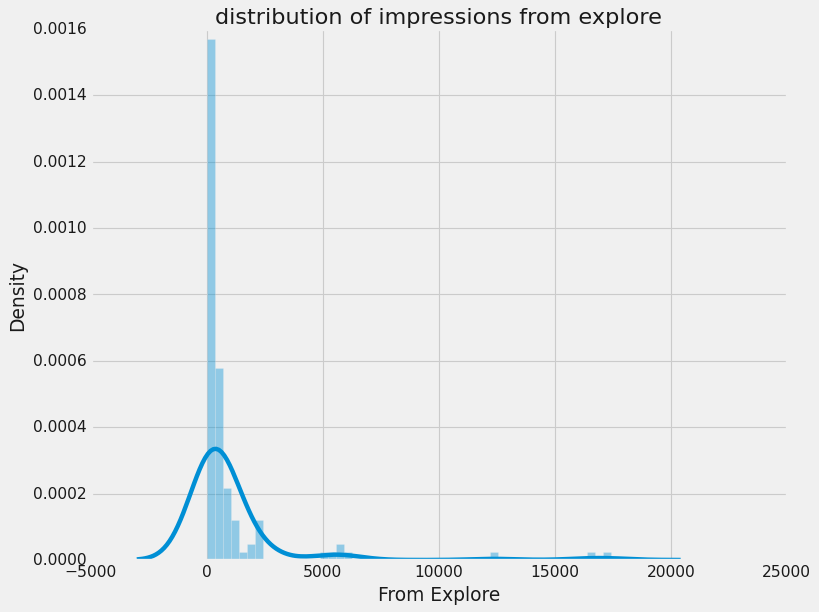

In [117]:
#distribution of impressions recieved from the explore section of instagram
plt.figure(figsize=(10,8))
plt.title("distribution of impressions from explore")
sns.distplot(data['From Explore'])
plt.show()

In [118]:
#Now Let's have a look at the percentage of impressions i get from various sources on instagram
Home = data['From Home'].sum()
Hashtags = data['From Hashtags'].sum()
Explore = data['From Explore'].sum()
Other = data['From Other'].sum()

labels = ['From Home','From Hashtags','From Explore','From Others']
values = [Home,Hashtags,Explore,Other]


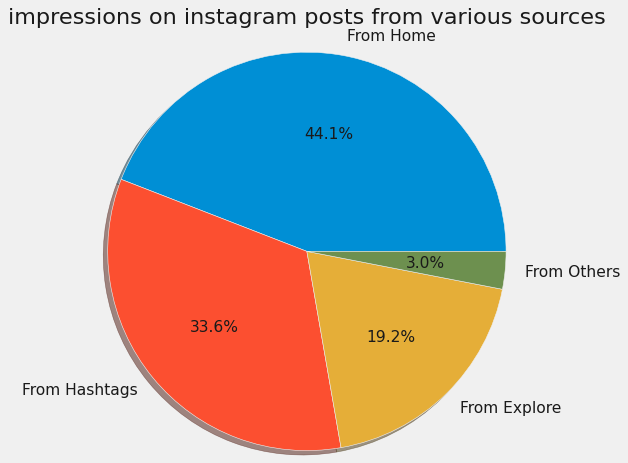

In [119]:
size=values
plt.pie(size,labels=labels,autopct='%1.1f%%',shadow=True,startangle=0)

plt.title('impressions on instagram posts from various sources\n')
plt.axis('equal')
plt.show()

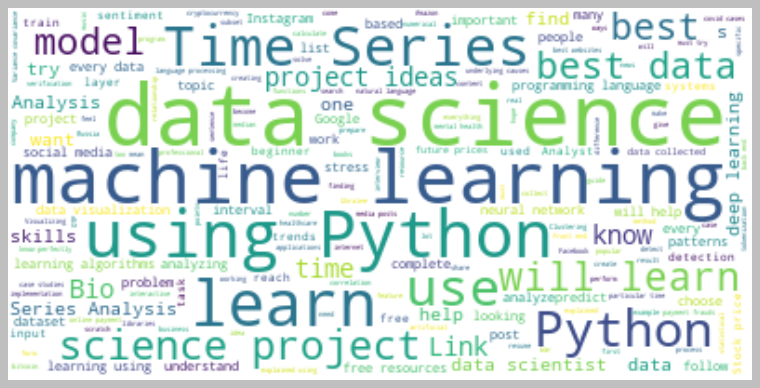

In [120]:
#Let's create a wordcloud of the caption column to look at the most used words in the caption of my instagram posts
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

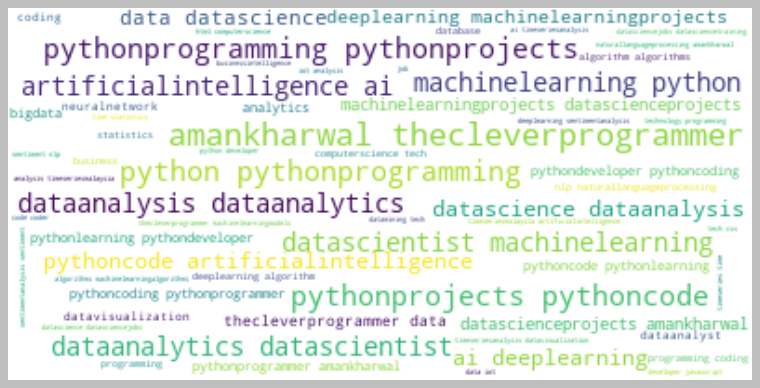

In [121]:
#Now Let's create a wordcloud of the hashtags column to look at the most used hashtags in our instagram posts
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
#Analysing relationships
#Let's have a look at the relationship between the number of likes and the number of impressions on our instagram posts

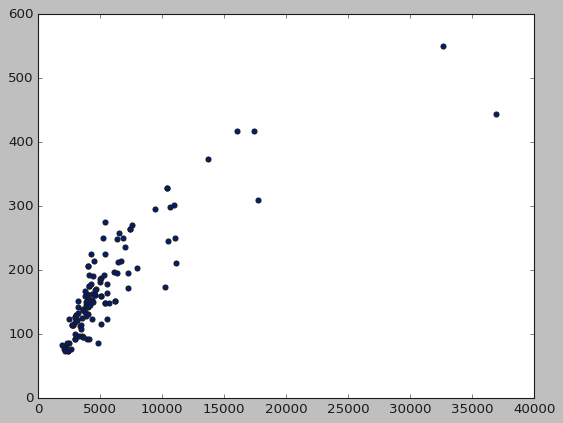

In [123]:
plt.scatter(data["Impressions"], data["Likes"])
plt.show()

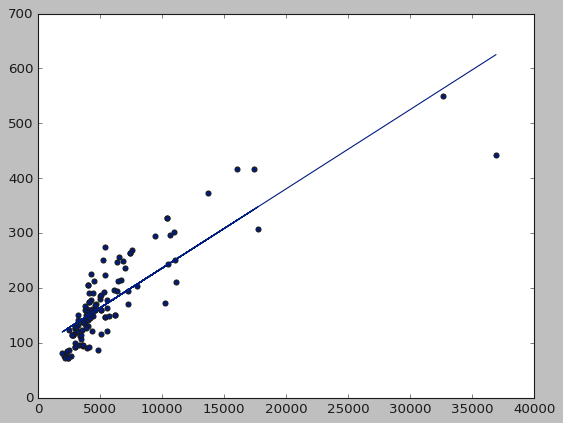

In [125]:
x=data["Impressions"]
y=data["Likes"]
slope, intercept, r, p, std_err=scipy.stats.linregress(x,y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

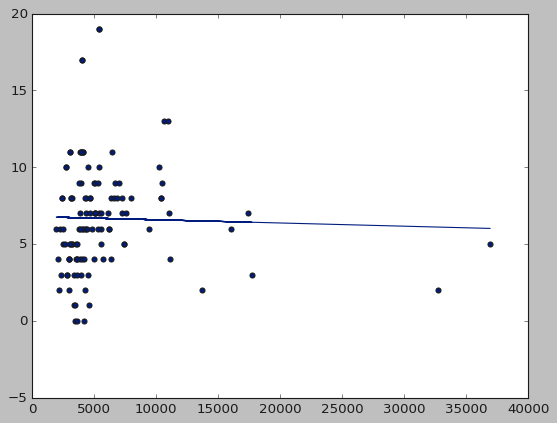

In [126]:
#Let's have a look at the relationship between the number of Comments and the number of impressions on our instagram posts
x=data["Impressions"]
y=data["Comments"]
slope, intercept, r, p, std_err=scipy.stats.linregress(x,y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

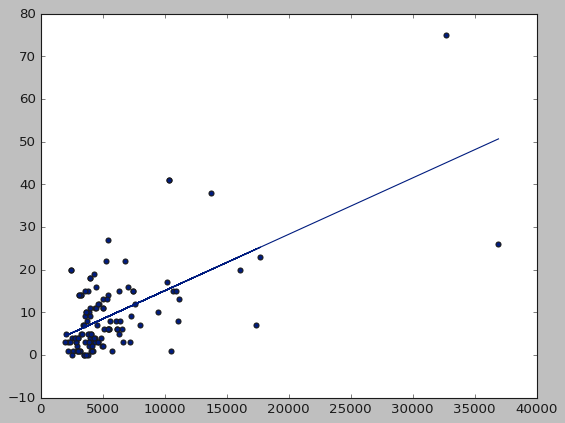

In [128]:
#Let's have a look at the relationship between the number of Shares and the number of impressions on our instagram posts
x=data["Impressions"]
y=data["Shares"]
slope, intercept, r, p, std_err=scipy.stats.linregress(x,y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

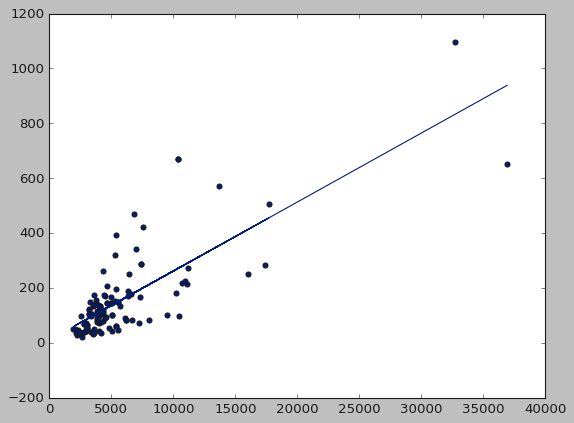

In [129]:
#Let's have a look at the relationship between the number of Saves and the number of impressions on our instagram posts
x=data["Impressions"]
y=data["Saves"]
slope, intercept, r, p, std_err=scipy.stats.linregress(x,y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

In [130]:
#Let's have a look at the correlation of all the columns with the Impressions column
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_9248\83769805.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [131]:
##Analysing conversion rate
conversion_rate = (data["Follows"].sum()/data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


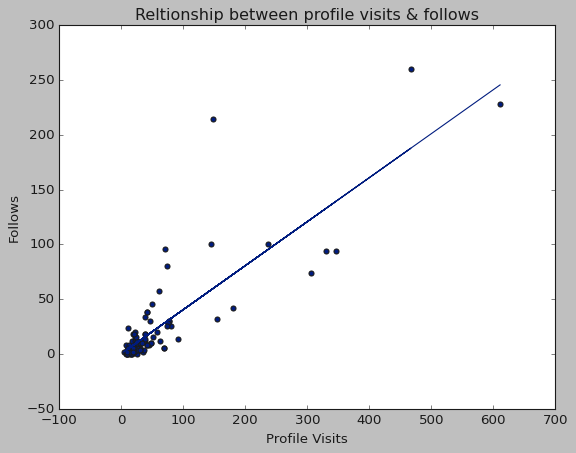

In [133]:
x=data["Profile Visits"]
y=data["Follows"]
slope, intercept, r, p, std_err=scipy.stats.linregress(x,y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc,x))
plt.scatter(x,y)
plt.title("Reltionship between profile visits & follows")
plt.xlabel("Profile Visits")
plt.ylabel("Follows")
plt.plot(x,mymodel)
plt.show()